The purpose of this code is train an MLP model by feeding it LDA outputs. This is assuming that the position of the balloons doesn't change. 

In [3]:
import os 
import numpy as np 
import pandas as pd 
import joblib 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
import plotly.graph_objects as go


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data_frames = []
y = []
for exp in range(1, 2): # change to range(10,11)
    for cls in range(10):
        df = pd.read_excel(
            f'Data/Experiment_{exp}/Class_{cls}/channel_c.xlsx',
            header=None
        )
        # data_frames.append(df)
        data_frames.append(df.iloc[:28].copy())
    y_1 = [i for i in range(10) for _ in range(28)] # change to 30 samples per class
    y.append(y_1)

X = pd.concat(data_frames, axis=0, ignore_index=True)
y = np.array(y).flatten()
df = X.copy()
df['y'] = y
df = df.dropna(axis=0, how="any").reset_index(drop=True)

In [6]:
original_df0 = data_frames[0].copy()
original_df0.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.746238,0.599865,0.708625,0.711091,0.770395,0.581038,0.606725,1.113306,0.682988,0.539971,...,0.694044,0.720851,0.551264,0.621314,0.576274,0.273903,0.188987,0.740241,0.723409,0.646430
1,0.907247,0.604647,0.729745,0.691507,0.766609,0.590765,0.540764,0.883865,0.676815,0.556271,...,0.691885,0.746842,0.555872,0.647484,0.551653,0.283190,0.182771,0.764481,0.717486,0.670962
2,0.923489,0.596033,0.746375,0.700919,0.766652,0.594856,0.637206,1.116346,0.684148,0.550529,...,0.693375,0.716615,0.567812,0.642496,0.557627,0.286455,0.175987,0.745561,0.738091,0.653487
3,0.922613,0.605856,0.725263,0.679248,0.759508,0.573084,0.497401,0.900545,0.681897,0.550460,...,0.691531,0.720249,0.565800,0.638101,0.560708,0.272972,0.181287,0.756627,0.726301,0.669114
4,0.923792,0.599726,0.738988,0.716085,0.758330,0.603789,0.590032,0.903288,0.686070,0.550629,...,0.690390,0.721466,0.565314,0.645800,0.554904,0.273576,0.189153,0.748854,0.717166,0.656865


In [ ]:
# def remove_outliers_iqr(df, label_col="y"):
#     # Separate features and label
#     X = df.drop(columns=[label_col])
    
#     # Compute IQR for each feature
#     Q1 = X.quantile(0.25)
#     Q3 = X.quantile(0.75)
#     IQR = Q3 - Q1

#     # Keep only rows where all features are within IQR bounds
#     mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
    
#     return df[mask].reset_index(drop=True)

# df_clean = remove_outliers_iqr(df, label_col="y")
# df_clean = df_clean.dropna(axis=0, how="any").reset_index(drop=True)
# print(df.shape, "->", df_clean.shape)

In [7]:
# for now use df as df_clean
df_clean = df.copy()

In [8]:
# Convert data to NumPy arrays
X = df_clean.drop(columns=['y']).to_numpy()
y = df_clean['y'].to_numpy()

In [9]:
# # Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
joblib.dump(scaler, "scaler/scaler_lda.pkl")

['scaler/scaler_lda.pkl']

In [10]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_normalized, y)
df_lda = pd.DataFrame(data=X_lda, columns=['C1', 'C2'])
df_lda['target'] = y
df_lda = pd.DataFrame(data=X_lda, columns=['C1', 'C2'])
df_lda['target'] = y 
df_lda['target'] = df_lda['target'].astype(str)

fig = px.scatter(df_lda, x='C1', y='C2', color='target', 
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='Inter-ring Excitation: Projection onto First and Second LDA Components',
                 labels={'target': 'Classes'},
                 hover_data={'C1': True, 'C2': True, 'target': True})
fig.update_layout(legend_title_text='Classes')
fig.show()

In [76]:
## Third attmpt 
data_frames = []
ytt = []
for exp in range(13, 14): # change to range(10,11)
    for cls in range(10):
        df = pd.read_excel(
            f'Data/Experiment_{exp}/Class_{cls}/channel_c.xlsx',
            header=None
        )
        data_frames.append(df)
    y_1 = [i for i in range(10) for _ in range(5)] # change to 30 samples per class
    ytt.append(y_1)

Xtt = pd.concat(data_frames, axis=0, ignore_index=True)
ytt = np.array(ytt).flatten()
dftt = Xtt.copy()
dftt['y'] = ytt
dftt = dftt.dropna(axis=0, how="any").reset_index(drop=True)

third_df0 = data_frames[0].copy()
third_df0.head()

X_normalizedtt = scaler.transform(Xtt)

In [77]:
df0 = data_frames[0].copy()
df1 = data_frames[1].copy()
df2 = data_frames[2].copy()
df3 = data_frames[3].copy()
df4 = data_frames[4].copy()
df5 = data_frames[5].copy()
df6 = data_frames[6].copy()
df7 = data_frames[7].copy()
df8 = data_frames[8].copy()
df9 = data_frames[9].copy()

In [72]:
row_original = original_df0.iloc[1].values
row_df0 = df0.iloc[1].values
row_third_df0 = third_df0.iloc[1].values

abs_diff_original_df0 = np.abs(row_original - row_df0)
abs_diff_original_third = np.abs(row_original - row_third_df0)
abs_diff_df0_third = np.abs(row_df0 - row_third_df0)

fig = go.Figure()
fig.add_trace(go.Scatter(y=row_original,mode='lines+markers',name='Yesterday-0'))
fig.add_trace(go.Scatter( y=row_df0, mode='lines+markers', name='Today-1'))
fig.add_trace(go.Scatter( y=row_third_df0, mode='lines+markers', name='Today_2'))

fig.add_trace(go.Scatter( y=abs_diff_original_df0, mode='lines+markers', name='0<->1'))
fig.add_trace(go.Scatter(y=abs_diff_original_third,mode='lines+markers',name='0<->2'))
fig.add_trace(go.Scatter( y=abs_diff_df0_third, mode='lines+markers', name='1<->2'))

fig.update_layout(title="Comparison of Original vs Processed Signals (Row 0)",xaxis_title="Index",yaxis_title="Value",template="plotly_white")
fig.show()

In [59]:
data_frames = []
yt = []
for exp in range(12, 13): # change to range(10,11)
    for cls in range(10):
        df = pd.read_excel(
            f'Data/Experiment_{exp}/Class_{cls}/channel_c.xlsx',
            header=None
        )
        data_frames.append(df)
    y_1 = [i for i in range(10) for _ in range(5)] # change to 30 samples per class
    yt.append(y_1)

Xt = pd.concat(data_frames, axis=0, ignore_index=True)
yt = np.array(yt).flatten()
dft = Xt.copy()
dft['y'] = yt
dft = dft.dropna(axis=0, how="any").reset_index(drop=True)

In [60]:
df0 = data_frames[0].copy()
df0.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.461978,0.158188,0.168999,0.339635,0.537225,0.387128,0.224938,0.130746,0.139981,0.116755,...,0.334461,0.111373,0.066782,0.669922,0.354739,0.331638,0.356415,0.444120,0.225372,0.107854
1,0.416294,0.172137,0.192246,0.366478,0.520036,0.385016,0.206184,0.098108,0.118954,0.111690,...,0.369381,0.107050,0.075639,0.695718,0.366118,0.344365,0.385984,0.451905,0.240096,0.108656
2,0.396284,0.150118,0.156012,0.426704,0.490104,0.359351,0.216481,0.097340,0.104460,0.122182,...,0.373478,0.115203,0.081838,0.704592,0.354799,0.353352,0.395400,0.439620,0.239693,0.111058
3,0.396678,0.139971,0.164372,0.425951,0.494889,0.353092,0.192352,0.098299,0.115070,0.106852,...,0.363215,0.098724,0.085062,0.683521,0.350384,0.336600,0.335556,0.429928,0.236481,0.102317
4,0.407697,0.138091,0.182180,0.472001,0.527259,0.360626,0.214119,0.094833,0.111756,0.107963,...,0.342296,0.113926,0.074486,0.676028,0.351298,0.335882,0.329446,0.428342,0.227953,0.105340


In [ ]:
df_cleant = dft.copy()
Xt = df_cleant.drop(columns=['y']).to_numpy() 
yt = df_cleant['y'].to_numpy()

In [42]:
X_normalizedt = scaler.transform(Xt)

In [43]:
X_normalizedt.shape 

(37, 128)

In [50]:
ldat = LDA(n_components=2)
X_ldat = ldat.fit_transform(X_normalizedt, yt)

# X_ldat = lda.transform(X_normalizedt)
df_ldat = pd.DataFrame(data=X_ldat, columns=['C1', 'C2'])
df_ldat['target'] = yt
df_ldat = pd.DataFrame(data=X_ldat, columns=['C1', 'C2'])
df_ldat['target'] = yt
df_ldat['target'] = df_ldat['target'].astype(str)


fig = px.scatter(df_lda, x='C1', y='C2', color='target', 
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='Inter-ring Excitation: Projection onto First and Second LDA Components',
                 labels={'target': 'Classes'},
                 hover_data={'C1': True, 'C2': True, 'target': True})

fig.update_layout(legend_title_text='Classes')
fig.show()

fig = px.scatter(df_ldat, x='C1', y='C2', color='target', 
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='Inter-ring Excitation: Projection onto First and Second LDA Components',
                 labels={'target': 'Classes'},
                 hover_data={'C1': True, 'C2': True, 'target': True})




fig.update_layout(legend_title_text='Classes')
fig.show()

df_lda2 = pd.concat([df_lda, df_ldat], ignore_index=True)
fig = px.scatter(df_lda2, x='C1', y='C2', color='target', 
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='Inter-ring Excitation: Projection onto First and Second LDA Components',
                 labels={'target': 'Classes'},
                 hover_data={'C1': True, 'C2': True, 'target': True})


fig.update_layout(legend_title_text='Classes')
fig.show()


In [51]:
# ldat = LDA(n_components=2)
# X_ldat = ldat.fit_transform(X_normalizedt, yt)

X_ldat = lda.transform(X_normalizedt)
df_ldat = pd.DataFrame(data=X_ldat, columns=['C1', 'C2'])
df_ldat['target'] = yt
df_ldat = pd.DataFrame(data=X_ldat, columns=['C1', 'C2'])
df_ldat['target'] = yt
df_ldat['target'] = df_ldat['target'].astype(str)


fig = px.scatter(df_lda, x='C1', y='C2', color='target', 
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='Inter-ring Excitation: Projection onto First and Second LDA Components',
                 labels={'target': 'Classes'},
                 hover_data={'C1': True, 'C2': True, 'target': True})

fig.update_layout(legend_title_text='Classes')
fig.show()

fig = px.scatter(df_ldat, x='C1', y='C2', color='target', 
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='Inter-ring Excitation: Projection onto First and Second LDA Components',
                 labels={'target': 'Classes'},
                 hover_data={'C1': True, 'C2': True, 'target': True})




fig.update_layout(legend_title_text='Classes')
fig.show()

df_lda2 = pd.concat([df_lda, df_ldat], ignore_index=True)
fig = px.scatter(df_lda2, x='C1', y='C2', color='target', 
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 title='Inter-ring Excitation: Projection onto First and Second LDA Components',
                 labels={'target': 'Classes'},
                 hover_data={'C1': True, 'C2': True, 'target': True})


fig.update_layout(legend_title_text='Classes')
fig.show()


In [64]:
row_original = original_df0.iloc[0].values
row_df0 = df0.iloc[0].values
abs_diff = np.abs(row_original - row_df0)
fig = go.Figure()
# Plot original signal
fig.add_trace(go.Scatter(
    y=row_original,
    mode='lines+markers',
    name='Original df0[0]'
))
# Plot new signal
fig.add_trace(go.Scatter(
    y=row_df0,
    mode='lines+markers',
    name='df0[0]'
))
# Plot absolute difference
fig.add_trace(go.Scatter(
    y=abs_diff,
    mode='lines+markers',
    name='|Original - df0|'
))
# Layout
fig.update_layout(
    title="Comparison of Original vs Processed Signals (Row 0)",
    xaxis_title="Index",
    yaxis_title="Value",
    template="plotly_white"
)
fig.show()

In [65]:
row_original = original_df0.iloc[1].values
row_df0 = df0.iloc[1].values
abs_diff = np.abs(row_original - row_df0)
fig = go.Figure()
# Plot original signal
fig.add_trace(go.Scatter(
    y=row_original,
    mode='lines+markers',
    name='Original df0[1]'
))
# Plot new signal
fig.add_trace(go.Scatter(
    y=row_df0,
    mode='lines+markers',
    name='df0[1]'
))
# Plot absolute difference
fig.add_trace(go.Scatter(
    y=abs_diff,
    mode='lines+markers',
    name='|Original - df0|'
))
# Layout
fig.update_layout(
    title="Comparison of Original vs Processed Signals (Row 1)",
    xaxis_title="Index",
    yaxis_title="Value",
    template="plotly_white"
)
fig.show()

In [82]:
row_original = df0.iloc[1].values
row_df0 = df1.iloc[1].values
abs_diff = np.abs(row_original - row_df0)
fig = go.Figure()
# Plot original signal
fig.add_trace(go.Scatter(
    y=row_original,
    mode='lines+markers',
    name='first'
))
# Plot new signal
fig.add_trace(go.Scatter(
    y=row_df0,
    mode='lines+markers',
    name='second'
))
# Plot absolute difference
fig.add_trace(go.Scatter(
    y=abs_diff,
    mode='lines+markers',
    name='|Δ|'
))
# Layout
fig.update_layout(
    title="Comparison between classes",
    xaxis_title="Index",
    yaxis_title="Value",
    template="plotly_white"
)
fig.show()

In [9]:
joblib.dump(lda, "lda_model.pkl")

['lda_model.pkl']

In [10]:
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_normalized, y)

# Create DataFrame
df_lda = pd.DataFrame(data=X_lda, columns=['C1', 'C2', 'C3'])
df_lda['target'] = y.astype(str)

# 3D scatter plot
fig = px.scatter_3d(df_lda, x='C1', y='C2', z='C3', color='target',
                    color_discrete_sequence=px.colors.qualitative.Set1,
                    title='Inter-ring Excitation: Projection onto First, Second, and Third LDA Components',
                    labels={'target': 'Classes'},
                    hover_data={'C1': True, 'C2': True, 'C3': True, 'target': True})

fig.update_layout(legend_title_text='Classes')
fig.show()

In [13]:
joblib.dump(lda, "lda_model_3d.pkl")

['lda_model_3d.pkl']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
df_lda.head()

,C1,C2,C3,target
0,-104.978670,25.412764,8.100136,0
1,-101.798411,24.007020,8.602760,0
2,-104.074877,26.337212,9.647444,0
3,-101.564562,26.641255,8.267403,0
4,-104.261598,25.789163,9.558031,0


In [26]:
X_lda = df_lda[['C1', 'C2', 'C3']].to_numpy()
y_lda = df_lda['target'].to_numpy().astype(int)

In [27]:
X_lda.shape

(136, 3)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_lda, test_size=0.2, random_state=42, stratify=y)

In [56]:
mlp = MLPClassifier(
    hidden_layer_sizes=(20, 20), 
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

In [57]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=500, random_state=42)

In [58]:
import joblib

# Save the trained model
joblib.dump(mlp, "model/mlp_model_lda.pkl")

# Later: Load the model
loaded_mlp = joblib.load("model/mlp_model_lda.pkl")

In [59]:
y_pred = mlp.predict(X_test)

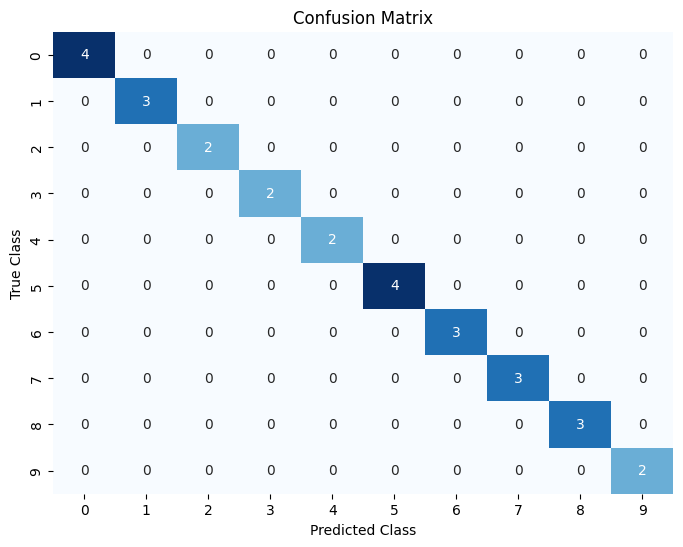

In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [34]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [35]:
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [36]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)

In [37]:
ap_per_class = []
for i in range(len(classes)):
    ap = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])
    ap_per_class.append(ap)
    print(f"AP for class {classes[i]}: {ap:.4f}")
    
mAP = np.mean(ap_per_class)
print(f"\nMean Average Precision (mAP): {mAP:.4f}")

AP for class 0: 1.0000
AP for class 1: 1.0000
AP for class 2: 1.0000
AP for class 3: 1.0000
AP for class 4: 1.0000
AP for class 5: 1.0000
AP for class 6: 1.0000
AP for class 7: 1.0000
AP for class 8: 1.0000
AP for class 9: 1.0000

Mean Average Precision (mAP): 1.0000
